<a href="https://colab.research.google.com/github/AnaAleixo/Projeto-4---Aprendizado-N-o-Supervisionado-PCA-/blob/main/Projeto%204%20Aprendizado%20N%C3%A3o%20Supervisionado%20(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <a>Projeto 4 - Aprendizado Não Supervisionado (PCA)</a>

*Let's Data - Jornada Cientista da Dados*

* Aluna: Ana Cláudia de Lima Aleixo

Data: 27/02/2023




## <a> Motivação </a>

PCA! Uma ferramenta muito útil na vida real e bastante subutilizada! Mais que um "martelo matemático", a análise de componmentes principais tem muitas aplicações práticas que podem ser utilizadas em praticamente qualquer empresa/organização.

Nesse ponto, os colegas do marketing estão muito à frente de muitas outras indústrias. Uma das principais aplicações é na segmentação de clientes, usuários, fornecedores, etc. Imagine uma empresa que queira lançar um novo produto e realiza uma pesquisa para entender melhor as necessidades/desejos dos clientes a fim de direcionar as campanhas de marketing para o lançamento. 

Questionários com dezenas ou até centenas de respostas são difíceis de analisar para agrupar os segmentos semelhantes. PCA chega para nos salvar: reduzir a dimensionalidade das respostas a tais questionários melhor muito a compreensão e aplicação da análise de aglomerados (clusterização).

Esse tipo de problema claramente é aplicável em diversos segmentos da economia!

## <a> Objeto de Estudo </a>

Você, padawan, foi contratado(a) como cientista de dados na Let's Ride, a próxima concorrente da Tesla Motors!!! Estamos lançando um novo conceito de carro, uma espécie de microvan (maior que SUV, mas menor que minivan), e queremos conhecer o melhor público para iniciar nossas campanhas de marketing.

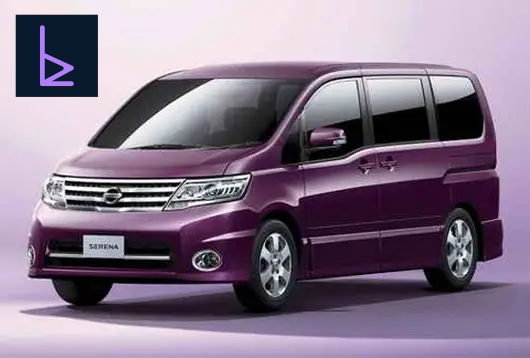

O principal método para detectar tais tendências é a pesquisa primária do consumidor, geralmente começando com grupos focais direcionados e prosseguindo para pesquisas de média e, eventualmente, de grande escala. Essas pesquisas servem a pelo menos dois propósitos: 
- verificar os “desejos e necessidades” de um determinado grupo/nicho de consumidores
- junto com os dados demográficos, tentar avaliar o perfil de quem gostou do conceito de microvan da Let's Ride

As perguntas de negócio que queremos responder são:
- Qual é o segmento alvo para este carro? 
- Quais são os desejos e necessidades deste segmento?

Então, a Let's Ride realizou pesquisa de vários grupos focais entre potenciais compradores desses carros. Ainda, a equipe de marketing examinou uma longa lista de potenciais atributos que poderiam ser importantes para compradores de microvans, bem como declarações de estilo de vida, validadas por suas extensas pesquisas anteriores na indústria automobilística. Com base em notas detalhadas feitas durante a fase de grupo focal, estabeleceu-se em um conjunto de 30 atributos que pareciam capturar a natureza da discussão, bem como variáveis demográficas importantes. O objetivo é usar esses atributos para capturar as dimensões-chave que caracterizam potenciais compradores e identificar os segmentos que a Let's Ride poderia criar para suas campanhas. Por fim, foi apresentado um projeto do carro (microvan) para que os potenciais consumidores dessem uma nota de 1 a 9 se gostaram ou não.

O problema é que, se fizermos uma análise de aglomerados com 30 features, o resultado não será muito inteligível e ficaria difícil depreender os perfis dos clientes. Podemos reduzir a dimensionalidade das features para agrupar as que possuem variância similar (PCA) e então avaliar qual foi o resultado dessa redução em termos de interesses dos clientes. Para avaliar a homegeneidade dos grupos, somente com clusterização, mas já com PCA conseguimos ter a junção de features com variância semelhante, o que, para respostas de questionários, serve como um agrupamento de perfis de respostas.

Assim como nos outros projetos, bancos, telefônicas, varejo, qualquer empresa que presta algum tipo de serviços e possui informações sobre seus clientes pode se beneficiar de análise de questionários de clientes e redução em componentes principais conforme iremos construir nesse projeto.

ps: esse estudo de caso real (Grosse Pointe Associates and The “Microvan”) está disponível no excelente livro "Modern Marketing Research: Concepts, Methods, and Cases" ISBN 1133188966

In [1]:
#!pip install scikit-learn pandas seaborn

In [2]:
# importando as bibliotecas para leitura dos dados e criação de gráficos
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns


# configurando pandas para mostrar todas as linhas e colunas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) 

# configurando pandas para não mostrar notação científica para números
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
# Ler os dados da microvan.
df_microvan = pd.read_csv('/content/microvan.csv')
df_microvan.head()

,subjnumb,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun,age,income,miles,numkids,female,educ,recycle
0,1,4,6,5,2,5,3,4,3,4,7,3,6,4,6,5,6,9,6,3,2,3,5,7,6,5,3,6,2,6,4,4,34,59,14,1,0,1,3
1,2,6,3,5,3,7,5,5,4,6,4,5,7,4,4,7,6,3,5,6,6,6,2,4,6,6,4,6,7,6,3,5,36,79,16,1,0,3,4
2,3,3,7,1,5,2,5,4,5,5,5,6,3,8,5,6,4,7,4,6,5,6,7,3,4,5,7,4,4,2,7,6,51,72,22,2,1,3,3
3,4,3,3,5,3,6,6,6,6,4,5,4,6,5,7,6,4,3,6,4,3,6,2,7,7,1,6,8,6,4,2,3,32,42,12,0,0,3,2
4,5,1,4,3,6,3,4,6,6,6,5,5,3,7,5,3,3,6,9,7,6,5,5,4,6,1,5,6,4,4,5,5,40,75,17,1,1,3,4


In [4]:
df_microvan.columns

Index(['subjnumb', 'mvliking', 'kidtrans', 'miniboxy', 'lthrbetr', 'secbiggr',
       'safeimpt', 'buyhghnd', 'pricqual', 'prmsound', 'perfimpt', 'tkvacatn',
       'noparkrm', 'homlrgst', 'envrminr', 'needbetw', 'suvcmpct', 'next2str',
       'carefmny', 'shdcarpl', 'imprtapp', 'lk4whldr', 'kidsbulk', 'wntguzlr',
       'nordtrps', 'stylclth', 'strngwrn', 'passnimp', 'twoincom', 'nohummer',
       'aftrschl', 'accesfun', 'age', 'income', 'miles', 'numkids', 'female',
       'educ', 'recycle'],
      dtype='object')

In [5]:
df_microvan = df_microvan.set_index('subjnumb')
df_microvan.head()

,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun,age,income,miles,numkids,female,educ,recycle
subjnumb,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4,6,5,2,5,3,4,3,4,7,3,6,4,6,5,6,9,6,3,2,3,5,7,6,5,3,6,2,6,4,4,34,59,14,1,0,1,3
2,6,3,5,3,7,5,5,4,6,4,5,7,4,4,7,6,3,5,6,6,6,2,4,6,6,4,6,7,6,3,5,36,79,16,1,0,3,4
3,3,7,1,5,2,5,4,5,5,5,6,3,8,5,6,4,7,4,6,5,6,7,3,4,5,7,4,4,2,7,6,51,72,22,2,1,3,3
4,3,3,5,3,6,6,6,6,4,5,4,6,5,7,6,4,3,6,4,3,6,2,7,7,1,6,8,6,4,2,3,32,42,12,0,0,3,2
5,1,4,3,6,3,4,6,6,6,5,5,3,7,5,3,3,6,9,7,6,5,5,4,6,1,5,6,4,4,5,5,40,75,17,1,1,3,4


Que monte de sopa de letras é essa!? Vamos às descrições (também chamado de dicionário de dados).

Além da variável **mvliking** que apresenta o quanto o(a) potencial cliente gostou do conceito da microvan, as outras colunas relacionadas ao questionário são:

- kidtrans: Precisamos de um carro que ajude a transportar nossos filhos os seus amigos.
- miniboxy: As minivans atuais são simplesmente muito quadradas e grandes.
- lthrbetr: Os assentos de couro são muito melhores que os de tecido.
- secbiggr: Se tivéssemos um segundo carro, precisaria ser maior que um sedã padrão.
- safeimpt: A segurança do automóvel é muito importante para mim.
- buyhghnd: Nós tendemos a comprar carros mais sofisticados.
- pricqual: Os preços dos automóveis refletem fortemente a qualidade de produção subjacente.
- prmsound: Um sistema de som e entretenimento premium ajuda em longas viagens de carro.
- perfimpt: O desempenho é muito importante em um carro.
- tkvacatn: Tentamos tirar o máximo de férias possível.
- noparkrm: Nossa residência atual não tem muito espaço de estacionamento.
- homlrgst: Nossa casa está entre as maiores do bairro.
- envrminr: O impacto ambiental dos automóveis é relativamente pequeno.
- needbetw: Precisa haver algo entre um sedan e uma minivan.
- suvcmpct: Gosto mais de SUVs do que de minivans, pois são mais compactos.
- next2str: Meu próximo carro será um de dois lugares.
- carefmny: Temos cuidado com o dinheiro.
- shdcarpl: Acho que todo mundo deveria pegar carona ou usar transporte público.
- imprtapp: A maioria dos nossos aparelhos são importados.
- lk4whldr: A tração nas quatro rodas é uma opção muito atraente.
- kidsbulk: Nossos filhos tendem a levar muitos itens volumosos e brinquedos com eles.
- wntguzlr: Eu vou comprar o que eu quero mesmo que seja um “bebedor de gás”.
- nordtrps: Não fazemos viagens com a família
- stylclth: Nós tendemos a comprar roupas elegantes para a família.
- strngwrn: A proteção da garantia precisa ser forte em um carro novo.
- passnimp: A paixão pelo trabalho é mais importante do que o pagamento.
- twoincom: Nossa família acharia difícil subsistir com apenas uma renda.
- nohummer: Não estou interessado em possuir um veículo como um Hummer.
- aftrschl: Nós nos envolvemos em mais atividades depois da escola do que a maioria das famílias.
- accesfun: Os acessórios realmente tornam o carro mais divertido de dirigir.

Já os dados demográficos dos clientes são:

- age: Idade do entrevistado em anos
- income: Renda familiar anual em milhares de dólares
- miles: Valor anual total conduzido por membros da família em milhares de milhas
- numkids: Número de crianças (0-18 anos) que residem no domicílio
- female: Se o entrevistado é ou não uma mulher
- educ: Nível de escolaridade do entrevistado (1 = Ensino médio, 2 = Alguma faculdade, 3 = Graduação, 4 = Pós-graduação)
- recycle: Reciclagem autorrelatada em comparação com a média (1 = Muito menos, 2 = Um pouco menos, 3 = Médio, 4 = Um pouco mais, 5 = Muito mais)

Como ninguém vai decorar isso... que tal a gente fazer um dicionário com as colunas como chave e as descrições como valor???

In [6]:
dicionario_dados = dict()

dicionario_dados['kidtrans'] = 'Precisamos de um carro que ajude a transportar nossos filhos os seus amigos'
dicionario_dados['miniboxy'] = 'As minivans atuais são simplesmente muito quadradas e grandes'
dicionario_dados['lthrbetr'] = 'Os assentos de couro são muito melhores que os de tecido'
dicionario_dados['secbiggr'] = 'Se tivéssemos um segundo carro, precisaria ser maior que um sedã padrão'
dicionario_dados['safeimpt'] = 'A segurança do automóvel é muito importante para mim'
dicionario_dados['buyhghnd'] = 'Nós tendemos a comprar carros mais sofisticados'
dicionario_dados['pricqual'] = 'Os preços dos automóveis refletem fortemente a qualidade de produção subjacente'
dicionario_dados['prmsound'] = 'Um sistema de som e entretenimento premium ajuda em longas viagens de carro'
dicionario_dados['perfimpt'] = 'O desempenho é muito importante em um carro'
dicionario_dados['tkvacatn'] = 'Tentamos tirar o máximo de férias possível'
dicionario_dados['noparkrm'] = 'Nossa residência atual não tem muito espaço de estacionamento'
dicionario_dados['homlrgst'] = 'Nossa casa está entre as maiores do bairro'
dicionario_dados['envrminr'] = 'O impacto ambiental dos automóveis é relativamente pequeno'
dicionario_dados['needbetw'] = 'Precisa haver algo entre um sedan e uma minivan'
dicionario_dados['suvcmpct'] = 'Gosto mais de SUVs do que de minivans, pois são mais compactos'
dicionario_dados['next2str'] = 'Meu próximo carro será um de dois lugares'
dicionario_dados['carefmny'] = 'Temos cuidado com o dinheiro'
dicionario_dados['shdcarpl'] = 'Acho que todo mundo deveria pegar carona ou usar transporte público'
dicionario_dados['imprtapp'] = 'A maioria dos nossos aparelhos são importados'
dicionario_dados['lk4whldr'] = 'A tração nas quatro rodas é uma opção muito atraente'
dicionario_dados['kidsbulk'] = 'Nossos filhos tendem a levar muitos itens volumosos e brinquedos com eles'
dicionario_dados['wntguzlr'] = 'Eu vou comprar o que eu quero mesmo que seja um “bebedor de gás”'
dicionario_dados['nordtrps'] = 'Não fazemos viagens com a família'
dicionario_dados['stylclth'] = 'Nós tendemos a comprar roupas elegantes para a família'
dicionario_dados['strngwrn'] = 'A proteção da garantia precisa ser forte em um carro novo'
dicionario_dados['passnimp'] = 'A paixão pelo trabalho é mais importante do que o pagamento'
dicionario_dados['twoincom'] = 'Nossa família acharia difícil subsistir com apenas uma renda'
dicionario_dados['nohummer'] = 'Não estou interessado em possuir um veículo como um Hummer'
dicionario_dados['aftrschl'] = 'Nós nos envolvemos em mais atividades depois da escola do que a maioria das famílias'
dicionario_dados['accesfun'] = 'Os acessórios realmente tornam o carro mais divertido de dirigir'
dicionario_dados['age'] = 'Idade do entrevistado em anos'
dicionario_dados['income'] = 'Renda familiar anual em milhares de dólares'
dicionario_dados['miles'] = 'Valor anual total conduzido por membros da família em milhares de milhas'
dicionario_dados['numkids'] = 'Número de crianças (0-18 anos) que residem no domicílio'
dicionario_dados['female'] = 'Se o entrevistado é ou não uma mulher'
dicionario_dados['educ'] = 'Nível de escolaridade do entrevistado (1 = Ensino médio, 2 = Alguma faculdade, 3 = Graduação, 4 = Pós-graduação)'
dicionario_dados['recycle'] = 'Reciclagem autorrelatada em comparação com a média (1 = Muito menos, 2 = Um pouco menos, 3 = Médio, 4 = Um pouco mais, 5 = Muito mais)'

In [7]:
# Será que funciona???

dicionario_dados['age'],  dicionario_dados['homlrgst']

('Idade do entrevistado em anos', 'Nossa casa está entre as maiores do bairro')

In [ ]:
# Nossa, pra que esnobar...

In [8]:
# Avaliando a quantidade de linhas e colunas
df_microvan.shape

(400, 38)

In [9]:
# Avaliando os tipos
df_microvan.dtypes

mvliking    int64
kidtrans    int64
miniboxy    int64
lthrbetr    int64
secbiggr    int64
safeimpt    int64
buyhghnd    int64
pricqual    int64
prmsound    int64
perfimpt    int64
tkvacatn    int64
noparkrm    int64
homlrgst    int64
envrminr    int64
needbetw    int64
suvcmpct    int64
next2str    int64
carefmny    int64
shdcarpl    int64
imprtapp    int64
lk4whldr    int64
kidsbulk    int64
wntguzlr    int64
nordtrps    int64
stylclth    int64
strngwrn    int64
passnimp    int64
twoincom    int64
nohummer    int64
aftrschl    int64
accesfun    int64
age         int64
income      int64
miles       int64
numkids     int64
female      int64
educ        int64
recycle     int64
dtype: object

In [10]:
df_microvan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   mvliking  400 non-null    int64
 1   kidtrans  400 non-null    int64
 2   miniboxy  400 non-null    int64
 3   lthrbetr  400 non-null    int64
 4   secbiggr  400 non-null    int64
 5   safeimpt  400 non-null    int64
 6   buyhghnd  400 non-null    int64
 7   pricqual  400 non-null    int64
 8   prmsound  400 non-null    int64
 9   perfimpt  400 non-null    int64
 10  tkvacatn  400 non-null    int64
 11  noparkrm  400 non-null    int64
 12  homlrgst  400 non-null    int64
 13  envrminr  400 non-null    int64
 14  needbetw  400 non-null    int64
 15  suvcmpct  400 non-null    int64
 16  next2str  400 non-null    int64
 17  carefmny  400 non-null    int64
 18  shdcarpl  400 non-null    int64
 19  imprtapp  400 non-null    int64
 20  lk4whldr  400 non-null    int64
 21  kidsbulk  400 non-null    int64
 22  wn

## <a> Começando com estatística descritiva </a>

Conhecer bem as medidas estatísticas, de tendência central, dispersão, separatrizes, distribuições, é essencial para conhecermos melhor os dados em que estamos trabalhando. 

In [11]:
df_microvan.describe()

,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun,age,income,miles,numkids,female,educ,recycle
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,4.84,4.83,4.67,4.25,5.23,5.00,5.28,4.96,4.72,5.00,4.44,4.58,5.49,5.53,4.94,4.78,4.49,5.22,5.17,4.56,5.24,4.48,5.06,5.32,5.34,5.04,5.62,4.87,4.85,4.38,4.64,40.05,71.28,18.04,1.22,0.54,2.81,3.04
std,2.69,1.52,1.48,1.52,1.51,1.51,1.54,1.52,1.51,1.49,1.53,1.52,1.50,1.52,1.55,1.51,1.55,1.53,1.50,1.50,1.46,1.48,1.51,1.49,1.53,1.50,1.51,1.56,1.54,1.51,1.52,8.57,43.28,4.86,1.08,0.50,0.93,1.18
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,19.00,15.00,7.00,0.00,0.00,1.00,1.00
25%,3.00,4.00,4.00,3.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,3.00,5.00,5.00,4.00,4.00,3.00,4.00,4.00,3.00,4.00,3.75,4.00,4.00,4.00,4.00,5.00,4.00,4.00,3.00,3.00,34.00,36.00,15.00,0.00,0.00,2.00,2.00
50%,5.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,4.00,5.00,6.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,6.00,5.00,5.00,4.00,5.00,40.00,62.50,18.00,1.00,1.00,3.00,3.00
75%,7.00,6.00,6.00,5.00,6.00,6.00,6.00,6.00,6.00,6.00,5.25,6.00,7.00,7.00,6.00,6.00,6.00,7.00,6.00,6.00,6.00,5.00,6.00,6.00,6.00,6.00,7.00,6.00,6.00,5.00,6.00,46.00,96.00,21.00,2.00,1.00,3.00,4.00
max,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,60.00,273.00,32.00,4.00,1.00,4.00,5.00


## <a> Redução de Dimensionalidade com PCA! </a>

Finalmente! Vamos agora reduzir a dimensionalidade utilizando análise de componentes principais (PCA).

### <a>Primeiro, vamos analisar quantos componentes vamos usar (o menor número com maior variância "explicada")</a>

In [12]:
colunas_demograficas = ['age', 'income', 'miles', 'numkids', 'female', 'educ', 'recycle', 'mvliking']
df_microvan.drop(colunas_demograficas, axis=1).head()

,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun
subjnumb,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,6,5,2,5,3,4,3,4,7,3,6,4,6,5,6,9,6,3,2,3,5,7,6,5,3,6,2,6,4,4
2,3,5,3,7,5,5,4,6,4,5,7,4,4,7,6,3,5,6,6,6,2,4,6,6,4,6,7,6,3,5
3,7,1,5,2,5,4,5,5,5,6,3,8,5,6,4,7,4,6,5,6,7,3,4,5,7,4,4,2,7,6
4,3,5,3,6,6,6,6,4,5,4,6,5,7,6,4,3,6,4,3,6,2,7,7,1,6,8,6,4,2,3
5,4,3,6,3,4,6,6,6,5,5,3,7,5,3,3,6,9,7,6,5,5,4,6,1,5,6,4,4,5,5


In [13]:
from sklearn.decomposition import PCA
import matplotlib.cm as cm

# Remover as colunas demograficas para deixar somente o questionário (retirar também a variável mvliking)
# O intuito é somente deixar as variáveis do questionário
colunas_demograficas = ['age', 'income', 'miles', 'numkids', 'female', 'educ', 'recycle', 'mvliking']

# Testando o número de compontentes e calculando a variância explicada de cada um
for numero_componentes in range(1, 10):
    # Classe PCA passando o número de componentes e o dataframe que vai ser reduzido
    pca = PCA(n_components=numero_componentes, random_state=42).fit(df_microvan.drop(colunas_demograficas, axis=1))
    print(f'{numero_componentes} componentes com variância explicada total de {sum(pca.explained_variance_ratio_)}: {pca.explained_variance_ratio_}')

1 componentes com variância explicada total de 0.27696709879672465: [0.2769671]
2 componentes com variância explicada total de 0.4445767750017477: [0.2769671  0.16760968]
3 componentes com variância explicada total de 0.5459459552274872: [0.2769671  0.16760968 0.10136918]
4 componentes com variância explicada total de 0.6342464490894244: [0.2769671  0.16760968 0.10136918 0.08830049]
5 componentes com variância explicada total de 0.6949209280291696: [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448]
6 componentes com variância explicada total de 0.7163695796236542: [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448 0.02144865]
7 componentes com variância explicada total de 0.7356422840632018: [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448 0.02144865
 0.0192727 ]
8 componentes com variância explicada total de 0.753873788437881: [0.2769671  0.16760968 0.10136918 0.08830049 0.06067448 0.02144865
 0.0192727  0.0182315 ]
9 componentes com variância explicada total de 0.77

In [14]:
# Escolhemos o número de compontentes em 5 pela explicabilidade da variância
pca = PCA(n_components = 5, random_state=42).fit(df_microvan.drop(colunas_demograficas, axis=1))

f'Ou seja, com cinco componentes temos {sum(pca.explained_variance_ratio_) * 100} da variância explicada!'

'Ou seja, com cinco componentes temos 69.49209280291696 da variância explicada!'

In [15]:
df_microvan.shape

(400, 38)

## <a>Análise dos Componentes</a>

Cada componente é criado como "parte" das variáveis originais. Ou seja, as variáveis originais compõe os componentes principais (lembra da projeção: o componente é a projeção dessas variáveis). Mas como saber o impacto de cada variável na projeção final? Existe um atributo no objeto PCA que mostra esses valores pra gente. 

#### <a>Entendera tudo, não é?? Então vou passar pro próximo módulo e....</a>

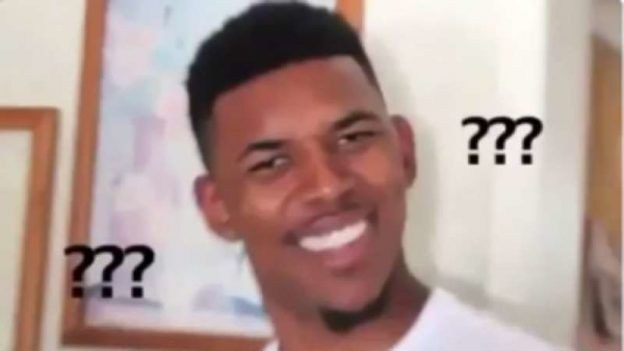
...

Tá bom! Vamos mostrar que essa sopa de números é, na verdade, a composição de cada componente com relação às variáveis originais!! Vamos também mostrar os pesos de cada feature na composição dos componentes de forma gráfica.

In [16]:
df_composicao_componentes = pd.DataFrame(columns=df_microvan.drop(colunas_demograficas, axis=1).columns)

for i in range(5):
    df_composicao_componentes.loc[i] = pca.components_[i]

df_composicao_componentes

,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun
0,-0.15,-0.03,-0.28,0.01,-0.07,-0.25,-0.19,-0.26,0.03,-0.29,-0.04,-0.16,0.17,-0.04,-0.06,-0.07,0.29,-0.17,-0.25,-0.11,-0.16,0.21,0.13,-0.26,-0.14,0.27,-0.20,-0.02,-0.15,-0.29
1,0.00,-0.36,0.08,-0.34,-0.00,-0.08,0.08,0.01,0.01,0.01,-0.36,0.30,0.02,-0.35,-0.36,0.34,0.07,0.01,0.01,0.01,-0.01,-0.01,0.04,-0.11,0.13,0.01,-0.06,-0.32,0.05,0.01
2,0.37,-0.05,-0.04,0.01,0.30,-0.07,-0.10,-0.06,-0.31,-0.08,0.02,-0.04,0.27,-0.00,0.08,0.02,0.06,-0.23,0.05,0.22,0.29,0.23,-0.34,-0.11,0.20,-0.01,-0.08,0.05,0.37,-0.05
3,0.31,-0.07,0.03,0.04,-0.44,-0.06,-0.02,-0.01,0.42,0.04,-0.00,-0.00,0.11,-0.05,0.05,0.07,0.01,-0.13,-0.02,-0.42,0.25,0.05,-0.26,0.03,-0.34,-0.11,-0.08,-0.02,0.18,0.07
4,-0.13,0.03,0.08,-0.07,-0.03,0.30,0.42,0.08,0.08,-0.05,0.11,-0.07,0.41,0.02,-0.04,0.17,-0.09,-0.42,-0.07,-0.03,-0.12,0.29,0.16,-0.04,0.03,-0.03,0.39,0.03,-0.02,0.01


In [17]:
dicionario_dados['secbiggr']

'Se tivéssemos um segundo carro, precisaria ser maior que um sedã padrão'

In [18]:
# Para o componente 1, vamos pegar o maior influência positiva e maior influência negativa

df_composicao_componentes.loc[0].max()

0.2919282078756141

In [19]:
# Hum, mas não quero o maior valor, quero o nome da coluna!

df_composicao_componentes.loc[0].argmax()

16

In [20]:
# Ai ai, foi quase! Tá bom, é a posição 16, que coluna é essa?

df_composicao_componentes.columns[df_composicao_componentes.loc[0].argmax()]

'carefmny'

E o que quer dizer essa variável??? Rá, padawan, lembro do nosso dicionário???

In [21]:
dicionario_dados['carefmny']

'Temos cuidado com o dinheiro'

Ou seja, esse componente tem uma forte influência dos "murrinhas", que tem cuidado com o dinheiro. Lembrando que não estamos analisando homogeneidade (isso é lá na clusterização), mas somente juntando variáveis que tem variâncias parecidas.

In [22]:
# Agora que sabemos como fazer, vamos calcular para cada componente

for i in range(5):
    coluna_maior = df_composicao_componentes.columns[df_composicao_componentes.loc[i].argmax()]
    coluna_menor = df_composicao_componentes.columns[df_composicao_componentes.loc[i].argmin()]
    
    print(f'Componente {i+1} impacto positivo: "{dicionario_dados[coluna_maior]}" e impacto negativo: "{dicionario_dados[coluna_menor]}"\n\n')

Componente 1 impacto positivo: "Temos cuidado com o dinheiro" e impacto negativo: "Tentamos tirar o máximo de férias possível"


Componente 2 impacto positivo: "Meu próximo carro será um de dois lugares" e impacto negativo: "As minivans atuais são simplesmente muito quadradas e grandes"


Componente 3 impacto positivo: "Nós nos envolvemos em mais atividades depois da escola do que a maioria das famílias" e impacto negativo: "Não fazemos viagens com a família"


Componente 4 impacto positivo: "O desempenho é muito importante em um carro" e impacto negativo: "A segurança do automóvel é muito importante para mim"


Componente 5 impacto positivo: "Os preços dos automóveis refletem fortemente a qualidade de produção subjacente" e impacto negativo: "Acho que todo mundo deveria pegar carona ou usar transporte público"




#### <a>Analisando graficamente os pesos de cada variável nos componentes principais</a>

In [23]:
dicionario_dados['envrminr']

'O impacto ambiental dos automóveis é relativamente pequeno'

<AxesSubplot:>

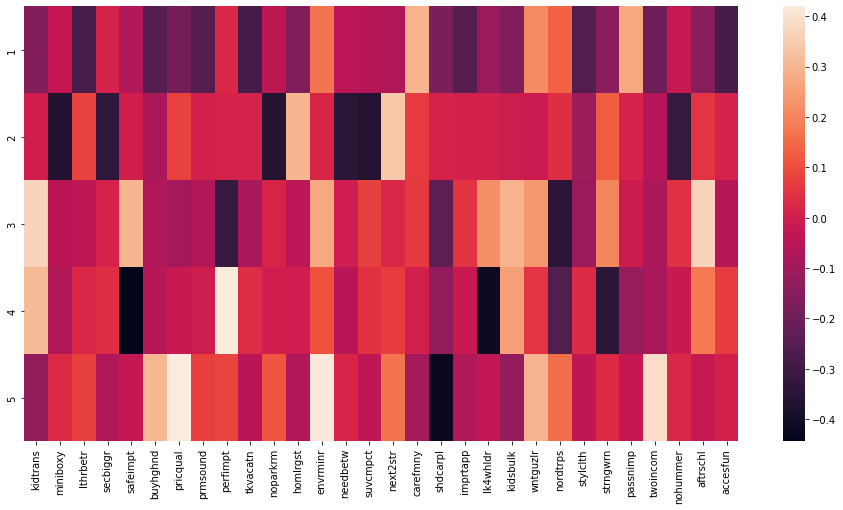

In [24]:
import seaborn as sns

plt.figure(figsize=(16, 8))
sns.heatmap(data=df_composicao_componentes, yticklabels=df_composicao_componentes.index+1)

Para facilitar o entendimento posterior e termos um nome mais mnemônico que somente componente 1, 2; podemos criar "nomes" para os componentes de acordo com suas características. Isso vai ser útil quando fizermos análise de aglomerados mais à frente!

- Componente 1: **Murrinhas sem férias!**
- Componente 2: **Gostamos de carros apertados!**
- Componente 3: **Família é o que interessa!**
- Componente 4: **Velozes e Furiosos!**
- Componente 5: **Pago caro por carro bom e não ligo para poluição!**

Apesar dos nomes e brincadeiras, de fato é importante reconhecer características dos componentes para embasar as campanhas de marketing. Entender os componentes faz com que tenhamos noção de quais variáveis tem variabilidade semelhante, o que, em questionários, realmente aproxima aquelas variáveis que são mais similares. 

Por fim, vamos transformar nosso dataframe original com os componentes que criamos?

In [25]:
componentes_principais_microvan = pca.transform(df_microvan.drop(colunas_demograficas, axis=1))
componentes_principais_microvan

array([[ 4.95739724, -0.630778  ,  0.25397408,  4.53413096,  0.4787577 ],
       [-0.42529226, -4.57730748, -2.68257259, -2.62292284, -0.50422577],
       [-4.20223653,  5.99835902,  2.46455968,  1.54782301, -2.41202492],
       ...,
       [-6.4115679 , -4.47822563, -6.6555251 , -0.29161379, -1.62472682],
       [-3.57270499, -5.5292335 ,  0.25267482,  2.61167859, -1.04362801],
       [ 4.05034892,  2.45977589,  3.75878157, -0.49039215,  0.74268315]])


## <a> Cenas dos próximos capítulos</a>

Viram que PCA é muito mais que somente redução de dimensionalidade? Que ele pode ser utilizado para um modelo preditivo (mais "batido" e comum), mas tem um poder imenso em análise de aglomerados e simplificação de campanhas de marketing.

Ficamos por aqui nesse projeto para continuar no próximo! Lá faremos a análise dos grupos e avaliar os que tem mais pretensões de comprar as microvans. Até lá! ;)